Book Reference: page 85-122 of **Python for Data Analysis Book by Wes McKinney**

## NumPy (Numerical Python)

- lingua franca for data exchange (for most computational packages providing scientific functionality)

a survey of things found in NumPy:
- `ndarray`, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.
- Mathematical functions for fast operations on entire arrays of data without having to write loops.
- Tools for reading/writing array data to disk and working with memory-mapped files.
- Linear algebra, random number generation, and Fourier transform capabilities.
- A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Why is NumPy so important for numerical computations in Python?
- It is designed for efficiency on large arrays of data.
    - internally stores data in a contiguous block of memory, independent of other built-in Python objects
    - written in C 
    - uses less memory than built-in Python sequences
    - perform complex computations on entire arrays without the need for Python for loops
    
---
### Extra Numpy Notes from UCSanDiegoX: DSE200x Python for Data Science

Key features
    - support for multi-dimensional arrays
    - built-in array operations
    simplified, but powerful array interactions (broadcasting)
    - fast for production code
    - integration of other languages (Fortran, C, C++)
    
Why numpy for data science?
- Speed (10 x faster than python's list)
    - Numpy arrays are fixed in size unlike lists which can change in size
    - numpy arrays should have elements with same type(dtype), space efficient, opens up a range of memory and computational optimizations

- Functionality
    
- Many packages are built on NumPy!!
    - pandas is built on Numpy

To give you an idea of the performance difference, consider a NumPy array of 1,000,000 integers and the equivalent Python list:

In [1]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [2]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 32 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 980 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their
pure Python counterparts and use significantly less memory.

## ndarray
- **N- dimensional array**
- generic multidimensional container for homogeneous data; that is, allof the elements must be the same type
- Every array has 
    - a shape, a tuple indicating the size of each dimension &
    - a dtype,

In [4]:
import numpy as np
    
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.0525054 , -1.9636573 ,  0.38191256],
       [ 0.00644725, -0.59412215, -0.54625404]])

In [5]:
data * 10

array([[ -0.52505403, -19.63657302,   3.81912561],
       [  0.06447255,  -5.94122151,  -5.46254038]])

In [6]:
data + data

array([[-0.10501081, -3.9273146 ,  0.76382512],
       [ 0.01289451, -1.1882443 , -1.09250808]])

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

### Creating ndarrays

In [9]:
# list to ndarray

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [10]:
# nested seq to ndarray
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
arr2.ndim # outputs num of dimensions

2

In [12]:
arr2.shape 

(2, 4)

In [13]:
# special arrays
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [15]:
np.empty((2,3,2))

array([[[1.52755129e-311, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 9.74809584e-072]],

       [[4.01770316e-057, 2.54577264e-052],
        [8.24777720e-071, 4.47130778e-033],
        [1.08554746e-042, 2.59982253e-056]]])

In [16]:
# np.empty may return uninitialized garbage values in some cases, 
# not always zero!!

In [17]:
np.arange(15)
# like the range Python built-in function

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data types for ndarrays

In [18]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

### Arithmetic with NumPy Arrays
- Vectorization
    - batch operations on data without writing any for loops
    - Any arithmetic operations between **equal-size** arrays applies the operation element-wise
- Broadcasting
    - Operations between differently sized arrays

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [20]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [21]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [23]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

In [24]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
arr[5:8]

array([5, 6, 7])

In [26]:
arr[5:8] = 12 # the value 12 is propagated (or broadcasted henceforth) to the entire selection
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [27]:
arr_slice = arr[5:8] # a slice **view** of the values with index 5 to 8
arr_slice
arr_slice[1] = 12345 
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [28]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

As NumPy has been designed to be able to work with very large arrays, **you could imagine performance
and memory problems if NumPy insisted on always copying data.**

to copy array (and not just a reference of the original array):
```
arr[5:8].copy()
```
or
```
a_slice = np.array(an_array[:2, 1:3])
```
or
```
a_slice = np.copy(an_array[:2, 1:3])
```

In [29]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) 
# 2 × 2 × 3 array
# count number of items outermost brackets to innermost 
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [30]:
arr3d[0] # 2 x 3 array

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
arr3d[1, 0]

array([7, 8, 9])

### Indexing with slices

### Boolean Indexing

In [33]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [34]:
data

array([[-0.60174923,  0.46446423,  0.40237896, -1.33970667],
       [-0.40742215, -1.79742622,  1.84297507,  0.35363582],
       [-0.11867129,  2.85181145,  1.22153483, -0.51586357],
       [-1.38665993, -0.31593242, -0.39922518, -0.63389667],
       [ 0.13572377, -1.70399705, -0.56606878,  0.52091449],
       [ 0.72079499,  0.05704808, -1.25247353, -0.77034481],
       [ 0.5332374 , -0.11838978, -1.58458023, -1.68622992]])

In [35]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [36]:
# Note that the boolean array (names) has the same length as the array axis
# it's indexing
data[names == 'Bob']

array([[-0.60174923,  0.46446423,  0.40237896, -1.33970667],
       [-1.38665993, -0.31593242, -0.39922518, -0.63389667]])

Warning from the book:
<span style="color:red">Boolean selection will not **fail** if the boolean array is not the correct
length, so I recommend care when using this feature.</span>

In [37]:
# to select everything but 'Bob'
data[~(names == 'Bob')]

array([[-0.40742215, -1.79742622,  1.84297507,  0.35363582],
       [-0.11867129,  2.85181145,  1.22153483, -0.51586357],
       [ 0.13572377, -1.70399705, -0.56606878,  0.52091449],
       [ 0.72079499,  0.05704808, -1.25247353, -0.77034481],
       [ 0.5332374 , -0.11838978, -1.58458023, -1.68622992]])

In [38]:
# Setting all of the negative values in data to 0
data[data < 0] = 0
data

array([[0.        , 0.46446423, 0.40237896, 0.        ],
       [0.        , 0.        , 1.84297507, 0.35363582],
       [0.        , 2.85181145, 1.22153483, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.13572377, 0.        , 0.        , 0.52091449],
       [0.72079499, 0.05704808, 0.        , 0.        ],
       [0.5332374 , 0.        , 0.        , 0.        ]])

### Fancy Indexing

- Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.

In [40]:
arr = np.empty((8, 4))

In [41]:
for i in range(8):
    arr[i] = i

In [42]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [43]:
# To select out a subset of the rows in a particular order, 
# you can simply pass a list or ndarray of integers specifying 
# the desired order:

arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [44]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [55]:
# Regardless of how many dimensions the array has, 
# the result of fancy indexing is always one-dimensional

# example below
arr = np.arange(12).reshape((4, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [56]:
arr[[1, 0, 2], [0, 0, 2]]

array([3, 0, 8])

### Transposing Arrays and Swapping Axes

In [57]:
arr = np.arange(15).reshape((3, 5))

In [58]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [59]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [61]:
arr = np.random.randn(6, 3)
arr

array([[-1.39437053,  2.4925723 ,  1.19054379],
       [-1.21187906, -0.948553  , -0.50672989],
       [-0.3424107 , -0.45567184,  1.66434493],
       [-0.18115435, -0.0622057 , -1.58112571],
       [ 0.27853178,  0.51366369,  0.4401155 ],
       [-1.5418577 , -0.37978795, -1.22287052]])

In [62]:
# computing the inner matrix product
np.dot(arr.T, arr)

array([[ 6.01788715, -1.43009148,  0.67865294],
       [-1.43009148,  7.73226509,  3.47863937],
       [ 0.67865294,  3.47863937,  8.63328619]])

In [63]:
# Switch rows
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [64]:
arr.transpose((1, 0, 2)) # axis, row_index1, row_index2 (row indices to be swapped)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [65]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [66]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### Universal Functions: Fast Element-Wise Array Functions

A universal function, or `ufunc`, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results

In [68]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
# unary ufuncs
print(np.sqrt(arr))
print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [72]:
x = np.random.randn(8)
y = np.random.randn(8)

print(x)
print(y)

# binary ufunc (maximum & add)
out = np.maximum(x,y)
print(out)

[ 0.10412206 -1.52906788  0.13962969 -0.49505508  1.3071699   0.34529371
 -1.08043821  0.3186438 ]
[ 0.2327187  -0.68290272  1.99757272 -0.72016696 -0.39594607 -0.07828963
 -1.75852034  1.45421037]
[ 0.2327187  -0.68290272  1.99757272 -0.49505508  1.3071699   0.34529371
 -1.08043821  1.45421037]


In [74]:
remainder, whole_part = np.modf(out)
print(remainder)
print(whole_part)

[ 0.2327187  -0.68290272  0.99757272 -0.49505508  0.3071699   0.34529371
 -0.08043821  0.45421037]
[ 0. -0.  1. -0.  1.  0. -1.  1.]


Ufuncs accept an optional out argument that allows them to operate **in-place** on
arrays

In [89]:
samp_arr = np.array([9,64,25], dtype='float64')
samp_arr.dtype
np.sqrt(samp_arr, samp_arr)
#samp_arr

array([3., 8., 5.])

### Array-Oriented Programming with Arrays

Vectorization 
    - This practice of replacing explicit loops with array expressions
    - vectorized array operations will often be **one or two** (or more) orders of magnitude faster than their pure Python equivalents

In [107]:
points = np.arange(-5, 5, 0.01)
print(points.shape)

(1000,)


In [108]:
xs, ys = np.meshgrid(points, points)

In [109]:
print(xs.shape)
xs

(1000, 1000)


array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [110]:
print(ys.shape)
ys

(1000, 1000)


array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [111]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
xs2, ys2 = np.meshgrid(a, b)
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [112]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [113]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

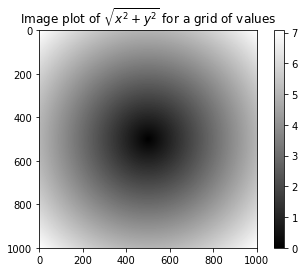

In [119]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

In [121]:
z.shape
z[450:550, 450:550]

array([[0.70710678, 0.70007142, 0.69310894, ..., 0.68622154, 0.69310894,
        0.70007142],
       [0.70007142, 0.69296465, 0.68593003, ..., 0.67896981, 0.68593003,
        0.69296465],
       [0.69310894, 0.68593003, 0.67882251, ..., 0.67178866, 0.67882251,
        0.68593003],
       ...,
       [0.68622154, 0.67896981, 0.67178866, ..., 0.66468037, 0.67178866,
        0.67896981],
       [0.69310894, 0.68593003, 0.67882251, ..., 0.67178866, 0.67882251,
        0.68593003],
       [0.70007142, 0.69296465, 0.68593003, ..., 0.67896981, 0.68593003,
        0.69296465]])

### Expressing Conditional Logic as Array Operations
- The numpy.where function is a vectorized version of the ternary expression x if condition else y.

`result = np.where(cond, output_whenTrue, output_whenFalse)` 

In [122]:
# Suppose you had a matrix of randomly generated
# data and you wanted to replace all positive values 
# with 2 and all negative values with
–2.
arr = np.random.randn(4, 4)
arr

array([[-0.6745775 ,  1.04298879,  0.69104663,  0.11932538],
       [-0.48426929, -1.03021054, -0.74240251, -0.05324456],
       [-0.80838756, -0.92458052, -0.45933006, -0.51448924],
       [-1.64002225, -0.47282873, -1.3177181 , -1.48936485]])

In [123]:
arr > 0

array([[False,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [124]:
np.where(arr>9, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2, -2, -2],
       [-2, -2, -2, -2],
       [-2, -2, -2, -2]])

### Mathematical and Statistical Methods

- You can use **aggregations (often called reductions)** 
    - like sum, mean, and std (standard deviation) either by
    calling the array instance method or using the top-level NumPy function.

In [135]:
arr = np.random.randint(1,35, (3,3))
arr

array([[30, 22, 13],
       [ 6, 17, 33],
       [30,  8, 16]])

In [136]:
print("mean: ", arr.mean())
print("mean also: ", np.mean(arr))
print("sum: ", arr.sum())
print("mean across the columns: ", arr.mean(1))
print("sum down the rows: ", arr.sum(0))
print("cumulative sum: ", arr.cumsum())

mean:  19.444444444444443
mean also:  19.444444444444443
sum:  175
mean across the columns:  [21.66666667 18.66666667 18.        ]
sum down the rows:  [66 47 62]
cumulative sum:  [ 30  52  65  71  88 121 151 159 175]


### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of **counting** True values in a boolean array:

In [137]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

45

In [138]:
bools = np.array([False, False, True, False])
print("any? ", bools.any()) # tests whether one or more values in an array is True,
print("all? ", bools.all()) #checks if every value is True


any?  True
all?  False


### Sorting

In [139]:
arr = np.random.randn(6)
arr

array([-0.09950218,  0.36950222, -1.19443254, -0.88049685, -0.54906169,
       -1.6986752 ])

In [141]:
arr.sort()
arr

array([-1.6986752 , -1.19443254, -0.88049685, -0.54906169, -0.09950218,
        0.36950222])

The top-level method `np.sort` returns a **sorted copy** of an array **instead of modifying the array in-place**.

#### Computing quantile (d quick and dirty way)

In [162]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6033663430317335

### Unique and Other Set Logic

In [163]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

`np.in1d`, tests membership of the values in one array in another,
returning a boolean array

In [164]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

`np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw **binary format** with file extension .npy:

In [167]:
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [169]:
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')

In [170]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Linear Algebra

- np.dot(x,y) or x.dot(y)
- The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication
- numpy.linalg 
    - has a standard set of matrix decompositions

In [173]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [174]:
x @ np.ones(3)

array([ 6., 15.])

In [175]:
np.ones(3)

array([1., 1., 1.])

In [196]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 3.05657472e-01, -8.18791012e-03, -1.02968230e-01,
         1.20078018e-01,  5.72145968e-02],
       [-8.18791012e-03,  6.80803994e-01,  4.69027944e-01,
        -4.53723702e-04, -4.40123124e-01],
       [-1.02968230e-01,  4.69027944e-01,  6.91499976e-01,
         1.19919256e-01, -2.87764628e-01],
       [ 1.20078018e-01, -4.53723702e-04,  1.19919256e-01,
         3.17117282e-01,  4.89815450e-02],
       [ 5.72145968e-02, -4.40123124e-01, -2.87764628e-01,
         4.89815450e-02,  4.18240527e-01]])

In [197]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  3.65221275e-17, -5.02664569e-17,
         1.48662552e-17, -4.65217986e-17],
       [-1.18308787e-17,  1.00000000e+00, -2.31106087e-17,
        -1.67713262e-17, -5.88361891e-16],
       [ 7.62516824e-17,  4.23510481e-16,  1.00000000e+00,
         4.69275633e-17,  1.29366284e-16],
       [ 1.88077721e-17, -1.46914369e-16,  1.48536838e-16,
         1.00000000e+00, -2.21670605e-17],
       [-1.65951985e-18,  3.96931181e-17, -2.94216891e-16,
         4.43478746e-17,  1.00000000e+00]])

In [198]:
q, r = qr(mat)

In [199]:
r

array([[-6.95742864,  7.01427799, -5.27050046,  5.14850071,  4.56780863],
       [ 0.        , -7.32004463,  1.44107078,  1.35555024, -8.28308265],
       [ 0.        ,  0.        , -2.90203136,  2.29668576, -3.38114268],
       [ 0.        ,  0.        ,  0.        , -2.75657805,  0.05174283],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.47906552]])

### Pseudorandom Number Generation

- `numpy.random`

In [200]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.8722024 ,  0.68855126, -0.65845473, -0.68134995],
       [-1.83271147,  1.08808701,  0.7072697 , -0.92824602],
       [ 1.8046231 , -0.44052036,  1.19944599, -0.89823346],
       [ 1.7459991 , -1.54585573,  1.00024934,  1.89552159]])

In [201]:
from random import normalvariate # Python's built-in random module
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

819 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [202]:
%timeit np.random.normal(size=N)

33.5 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are **pseudorandom numbers** because they are generated by an algorithm with deterministic behavior based on the **seed of the random number generator.**

In [204]:
# change seed through the func below
np.random.seed(1234)

The data generation functions in numpy.random use a **global random seed**.  
To avoid global state, you can use `numpy.random.RandomState` to create a random number generator isolated from others

In [205]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks

In [206]:
# pure Python way to implement random walk using random module
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

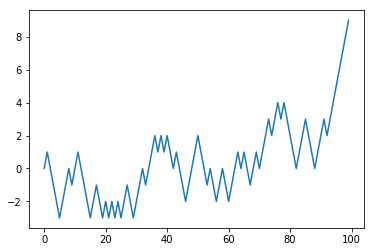

In [207]:
plt.plot(walk[:100])

In [208]:
nsteps = 1000
draws = np.random.randint(0,2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-9

In [209]:
walk.max()

60

A more complicated statistic is the **first crossing time**, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using `argmax`, which returns the first index of the maximum value in the boolean array (True is the maximum value):

In [210]:
(np.abs(walk) >= 10).argmax()

297

### Simulating Many Random Walks at Once

In [211]:
nwalks = 5000 # number of walks
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # across the 1000 nsteps(columns)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [212]:
walks.max()

122

In [213]:
walks.min()

-128

In [216]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.shape)

[ True  True  True ...  True False  True]
(5000,)


In [217]:
hits30.sum() # Number that hit 30 or -30

3368

In [219]:
# We can use this boolean array to select out the rows of walks that actually 
# cross the absolute 30 level and call argmax across axis 1 to 
# get the crossing times:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787